In [54]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [55]:
import pandas as pd

project_data=pd.read_csv("train.csv")
ts_fresh_train = pd.read_csv('X_train_final.csv')
ts_fresh_test = pd.read_csv('X_test_tsfresh.csv')
ts_fresh_valid = pd.read_csv('X_valid_tsfresh.csv')

In [56]:
ts_fresh_train.shape

(190089, 73)

In [50]:
ts_fresh_test.head()

,id,Hour__length,Hour__maximum,Hour__mean,Hour__median,Hour__minimum,Hour__standard_deviation,Hour__sum_values,Hour__variance,app_code__length,...,weekend__sum_values,weekend__variance,year__length,year__maximum,year__mean,year__median,year__minimum,year__standard_deviation,year__sum_values,year__variance
0,0,1.0,7.0,7.0,7.0,7.0,0.0,7.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
1,1,1.0,7.0,7.0,7.0,7.0,0.0,7.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
2,2,1.0,7.0,7.0,7.0,7.0,0.0,7.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
3,3,1.0,7.0,7.0,7.0,7.0,0.0,7.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
4,4,1.0,7.0,7.0,7.0,7.0,0.0,7.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0


In [51]:
ts_fresh_valid.head()

,id,Hour__length,Hour__maximum,Hour__mean,Hour__median,Hour__minimum,Hour__standard_deviation,Hour__sum_values,Hour__variance,app_code__length,...,weekend__sum_values,weekend__variance,year__length,year__maximum,year__mean,year__median,year__minimum,year__standard_deviation,year__sum_values,year__variance
0,0,1.0,18.0,18.0,18.0,18.0,0.0,18.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
1,1,1.0,18.0,18.0,18.0,18.0,0.0,18.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
2,2,1.0,18.0,18.0,18.0,18.0,0.0,18.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
3,3,1.0,18.0,18.0,18.0,18.0,0.0,18.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0
4,4,1.0,18.0,18.0,18.0,18.0,0.0,18.0,0.0,1.0,...,0.0,0.0,1.0,2018.0,2018.0,2018.0,2018.0,0.0,2018.0,0.0


In [3]:
project_data.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [4]:
project_data['impression_time'] = pd.to_datetime(project_data['impression_time'],format='%Y-%m-%d %H:%M:%S')

In [5]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null datetime64[ns]
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 12.7+ MB


In [6]:
import time

In [7]:
project_data['impression_time_unix'] = project_data['impression_time'].apply(lambda x : time.mktime(x.timetuple()))

In [8]:
project_data.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_unix
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,1.542220e+09
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,1.542220e+09
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,1.542220e+09
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,1.542220e+09
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,1.542220e+09


In [9]:
project_data.shape

(237609, 8)

### Some important features year,month,day,hour,min, day of week added

In [10]:
import datetime as dt

In [11]:
project_data['year'] = project_data['impression_time'].dt.year

In [12]:
project_data['month'] = project_data['impression_time'].apply(lambda x:x.month)

In [13]:
project_data['hour'] = project_data['impression_time'].apply(lambda x:x.hour)

In [14]:
project_data['min'] = project_data['impression_time'].apply(lambda x:x.minute)

In [15]:
project_data['dayofweek'] = project_data['impression_time'].apply(lambda x:x.dayofweek)

In [16]:
def weekend(x):
    if x<5:
        return 0
    else:
        return 1

In [17]:
project_data['weekend'] = project_data['dayofweek'].apply(weekend)

In [18]:
project_data.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_unix,year,month,hour,min,dayofweek,weekend
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,1.542220e+09,2018,11,0,0,3,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,1.542220e+09,2018,11,0,1,3,0
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,1.542220e+09,2018,11,0,2,3,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,1.542220e+09,2018,11,0,2,3,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,1.542220e+09,2018,11,0,2,3,0


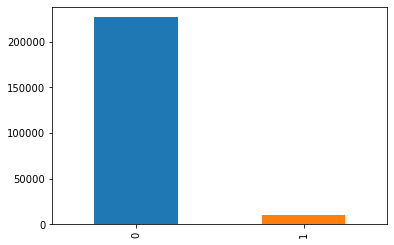

In [19]:
project_data['is_click'].value_counts().plot.bar()

In [20]:
project_data['is_click'].value_counts()

0    226747
1     10862
Name: is_click, dtype: int64

In [30]:
y = project_data.iloc[:,6]

In [40]:
y_train = y[:190089]

In [41]:
y_train.shape

(190089,)

In [42]:
y_test = y[190089:]

In [43]:
y_test.shape

(47520,)

In [22]:
x = project_data.drop('is_click',axis=1)

In [23]:
x.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,impression_time_unix,year,month,hour,min,dayofweek,weekend
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,1.542220e+09,2018,11,0,0,3,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1.542220e+09,2018,11,0,1,3,0
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,1.542220e+09,2018,11,0,2,3,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,1.542220e+09,2018,11,0,2,3,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,1.542220e+09,2018,11,0,2,3,0


In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=2,shuffle=False)

# Deep Learning MODEL

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# integer encode the documents
c = CountVectorizer()
c.fit(x_train['os_version'])
encoded_os_version_train = c.transform(x_train['os_version'])
#encoded_os_version_cv = c.transform(x_cv['os_version'])
encoded_os_version_test = c.transform(x_test['os_version'])

print("Train Encoded Vector",encoded_os_version_train[1])
print("Length of encoded train",)
print("*"*125)
print("Test Encoded Vector",encoded_os_version_test[1])
print("Length of encoded test",encoded_os_version_test.shape)


# pad documents to a max length of 4 words
max_length = 3
padded_os_version_train = pad_sequences(encoded_os_version_train.toarray(), maxlen=max_length, padding='post')
#padded_os_version_cv = pad_sequences(encoded_os_version_cv.toarray(), maxlen=max_length, padding='post')
padded_os_version_test = pad_sequences(encoded_os_version_test.toarray(), maxlen=max_length, padding='post')
print("*"*125)
print("Train Padded Vector shape",padded_os_version_train.shape)
print("Test Padded Vector shape",padded_os_version_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_os_version_train[1])
print("Test Padded Vector ",padded_os_version_test[1])

Using TensorFlow backend.


Train Encoded Vector   (0, 1)	1
Length of encoded train
*****************************************************************************************************************************
Test Encoded Vector   (0, 2)	1
Length of encoded test (71283, 3)
*****************************************************************************************************************************
Train Padded Vector shape (166326, 3)
Test Padded Vector shape (71283, 3)
*****************************************************************************************************************************
Train Padded Vector  [0 1 0]
Test Padded Vector  [0 0 1]


In [26]:
from sklearn.preprocessing import StandardScaler
app_code_scalar = StandardScaler()
app_code_scalar.fit(x_train['app_code'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_train_app_code_std = app_code_scalar.transform(x_train['app_code'].values.reshape(-1,1))
#x_cv_app_code_std = app_code_scalar.transform(x_cv['app_code'].values.reshape(-1,1))
x_test_app_code_std = app_code_scalar.transform(x_test['app_code'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_app_code_std.shape, y_train.shape)
#print(x_cv_app_code_std.shape, y_cv.shape)
print(x_test_app_code_std.shape, y_test.shape)
print("="*100)
print(f"Mean : {app_code_scalar.mean_[0]}, Standard deviation : {np.sqrt(app_code_scalar.var_[0])}")

After vectorizations
(166326, 1) (166326,)
(71283, 1) (71283,)
Mean : 247.75992328319083, Standard deviation : 135.67487385404763


In [27]:
# pad documents to a max length of 4 words

padded_app_code_train = x_train_app_code_std
#padded_app_code_cv = x_cv_app_code_std
padded_app_code_test = x_test_app_code_std
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_app_code_train.shape)
print("Test Padded Vector shape",padded_app_code_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_app_code_train[57])
print("Test Padded Vector ",padded_app_code_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326, 1)
Test Padded Vector shape (71283, 1)
*****************************************************************************************************************************
Train Padded Vector  [0.90834856]
Test Padded Vector  [-0.42572307]


In [28]:
# pad documents to a max length of 4 words

padded_is_4G_train = x_train['is_4G'].values
#padded_is_4G_cv = x_cv_is_4G_std
padded_is_4G_test = x_test['is_4G'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_is_4G_train.shape)
print("Test Padded Vector shape",padded_is_4G_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_is_4G_train[57])
print("Test Padded Vector ",padded_is_4G_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  0
Test Padded Vector  0


In [29]:
padded_impression_time_unix_train = x_train['impression_time_unix'].values
#padded_impression_time_unix_cv = x_cv_impression_time_unix_std
padded_impression_time_unix_test = x_test['impression_time_unix'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_impression_time_unix_train.shape)
print("Test Padded Vector shape",padded_impression_time_unix_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_impression_time_unix_train[57])
print("Test Padded Vector ",padded_impression_time_unix_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  1542222900.0
Test Padded Vector  1543748280.0


In [30]:
padded_year_train = x_train['year'].values
#padded_year_cv = x_cv_year_std
padded_year_test = x_test['year'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_year_train.shape)
print("Test Padded Vector shape",padded_year_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_year_train[57])
print("Test Padded Vector ",padded_year_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  2018
Test Padded Vector  2018


In [31]:
padded_month_train = x_train['month'].values
#padded_month_cv = x_cv_month_std
padded_month_test = x_test['month'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_month_train.shape)
print("Test Padded Vector shape",padded_month_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_month_train[57])
print("Test Padded Vector ",padded_month_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  11
Test Padded Vector  12


In [32]:
padded_hour_train = x_train['hour'].values
#padded_hour_cv = x_cv_hour_std
padded_hour_test = x_test['hour'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_hour_train.shape)
print("Test Padded Vector shape",padded_hour_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_hour_train[57])
print("Test Padded Vector ",padded_hour_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  0
Test Padded Vector  16


In [33]:
padded_min_train = x_train['min'].values
#padded_min_cv = x_cv_min_std
padded_min_test = x_test['min'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_min_train.shape)
print("Test Padded Vector shape",padded_min_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_min_train[57])
print("Test Padded Vector ",padded_min_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  45
Test Padded Vector  28


In [34]:
padded_dayofweek_train = x_train['dayofweek'].values
#padded_dayofweek_cv = x_cv_dayofweek_std
padded_dayofweek_test = x_test['dayofweek'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_dayofweek_train.shape)
print("Test Padded Vector shape",padded_dayofweek_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_dayofweek_train[57])
print("Test Padded Vector ",padded_dayofweek_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  3
Test Padded Vector  6


In [35]:
padded_weekend_train = x_train['weekend'].values
#padded_weekend_cv = x_cv_weekend_std
padded_weekend_test = x_test['weekend'].values
max_length = 1

print("*"*125)
print("Train Padded Vector shape",padded_weekend_train.shape)
print("Test Padded Vector shape",padded_weekend_test.shape)
print("*"*125)
print("Train Padded Vector ",padded_weekend_train[57])
print("Test Padded Vector ",padded_weekend_test[57])

*****************************************************************************************************************************
Train Padded Vector shape (166326,)
Test Padded Vector shape (71283,)
*****************************************************************************************************************************
Train Padded Vector  0
Test Padded Vector  1


In [36]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters,MinimalFCParameters,EfficientFCParameters,from_columns

In [37]:
settings_minimal = MinimalFCParameters()
settings_minimal

{'sum_values': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'maximum': None,
 'minimum': None}

In [38]:
project_data['id'] = np.arange(0,project_data.shape[0])

In [3]:
from scipy.sparse import hstack
X_train_data = ts_fresh_train.values

In [4]:
X_valid_data = ts_fresh_valid.values

In [5]:
X_test_data = ts_fresh_test.values

In [6]:
#X_test_data = np.column_stack([padded_os_version_test,padded_app_code_test,padded_is_4G_test,padded_impression_time_unix_test,padded_year_test,padded_month_test,padded_hour_test,padded_min_test,padded_dayofweek_test,padded_weekend_test])

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [48]:
X_train_data.shape[1]

73

In [9]:
max_length = X_train_data.shape[1]
input_layer1 = Input(shape=(max_length,), name='input_layer1')

In [10]:
from keras.regularizers import l2
reg=l2(1e-4)

In [11]:
X_train = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer = reg)(input_layer1)
drop = Dropout(0.5)(X_train)


X_train = Dense(64, activation='relu',kernel_initializer="he_normal")(drop)
drop = Dropout(0.5)(X_train)

X_train = Dense(64, activation='relu',kernel_initializer="he_normal")(drop)
drop = Dropout(0.5)(X_train)

X_train = Dense(64, activation='relu',kernel_initializer="he_normal")(drop)
drop = Dropout(0.5)(X_train)


X_train = Dense(2, activation='relu',kernel_initializer="he_normal")(drop)

main_output3 = Dense(2, activation='softmax', name='main_output3')(X_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
from keras.models import Model
model = Model(inputs=[input_layer1], outputs=[main_output3])

In [13]:
from keras.callbacks import Callback, EarlyStopping
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def aucroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[aucroc,'accuracy'])

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer1 (InputLayer)    (None, 73)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4736      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

In [16]:
input_data_train = [X_train_data]
#input_data_cv3 = [padded_docs_cv,other_than_text_data_cv]
input_data_test = [X_test_data]

In [17]:
x_train={'input_layer1':X_train_data}

In [18]:
x_test={'input_layer1':X_test_data}

In [34]:
from keras.utils import to_categorical
y_train3 = to_categorical(y_train)
#y_cv3 = to_categorical(y_cv)
y_test3 = to_categorical(y_test)

In [35]:
%reload_ext tensorboard.notebook
import tensorflow as tf
import numpy as np
import datetime, os

In [36]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [37]:
import keras
mc = keras.callbacks.ModelCheckpoint('best_model_weights.hdf5', monitor='val_aucroc', mode='max', verbose=1, save_best_only=True)

In [38]:
model.fit(x_train, y_train3, nb_epoch=30, batch_size=200,validation_data = (x_test,y_test3),callbacks=[mc,es])

ValueError: Input arrays should have the same number of samples as target arrays. Found 90675 input samples and 47520 target samples.